### Pandas

Library for working with `relational` or labeled data, built on top of NumPy package. [<u>more details</u>](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

In [38]:
import pandas as pd

### DataFrame

A DataFrame is a `multi-dimensional table` made up from a collection of Series.

In [39]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

df = pd.DataFrame(data)
display(df)

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


### Read CSV


Import a comma-separated values (csv) file into a `DataFrame`.

In [40]:
df = pd.read_csv("_data/titanic.csv")
display(df.head())

print("Size:", df.size)
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Size: 7878
Shape: (1313, 6)
Columns: Index(['Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
 5   SexCode   1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


### Location

Both `iloc` and loc are very useful during search and data cleaning.

In [41]:
df = pd.read_csv("_data/titanic.csv")

# Select 2nd to 4th row:
display(df.iloc[1:4])

# Select by index (name):
df = df.set_index(df['Name'])
display(df.loc['Allen, Miss Elisabeth Walton'])

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                 29.0
Sex                               female
Survived                               1
SexCode                                1
Name: Allen, Miss Elisabeth Walton, dtype: object

### Conditional

Conditional selecting and `filtering` data are common tasks.

In [42]:
df = pd.read_csv("_data/titanic.csv")

females = df[df['Sex'] == 'female']
males_60 = df[(df['Sex'] == 'male') & (df['Age'] >= 60)]

print("Females:", females.size)
display(females.head())

print("Males age 60+:", males_60.size)
display(males_60.head())

Females: 2772


,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.0,female,1,1


Males age 60+: 108


,Name,PClass,Age,Sex,Survived,SexCode
9,"Artagaveytia, Mr Ramon",1st,71.0,male,0,0
72,"Crosby, Captain Edward Gifford",1st,70.0,male,0,0
103,"Fortune, Mr Mark",1st,64.0,male,0,0
110,"Frolicher-Stehli, Mr Maxmillian",1st,60.0,male,1,0
119,"Goldschmidt, Mr George B",1st,71.0,male,0,0


### Replace

Replace accepts `regex` regular expressions.

In [43]:
df = pd.read_csv("_data/titanic.csv")

# Replace female/male
df['Sex'] = df['Sex'].replace(['female', 'male'], ['Woman', 'Man'])
df['PClass'] = df['PClass'].replace(r'1st', 'First', regex=True)
display(df.head())

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",First,29.00,Woman,1,1
1,"Allison, Miss Helen Loraine",First,2.00,Woman,0,1
2,"Allison, Mr Hudson Joshua Creighton",First,30.00,Man,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",First,25.00,Woman,0,1
4,"Allison, Master Hudson Trevor",First,0.92,Man,1,0


### Statistics

Pandas has multiple `built-in methods` for descriptive statistics.

In [44]:
df = pd.read_csv("_data/titanic.csv")

# Statistics (by Age)
A = pd.DataFrame()
A['max'] = [df['Age'].max()]
A['min'] = [df['Age'].min()]
A['avg'] = [df['Age'].mean()]
display(A)

# Value counts (by PClass)
A = pd.DataFrame()
A['PClass'] = df['PClass'].value_counts()
display(A)

# Unique values (by Sex)
A = pd.DataFrame()
A['unique_value'] = df['Sex'].unique()
A['total'] = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]
display(A)

# Missing values (by Agge)
A = pd.DataFrame()
A = df[df['Age'].isnull()]

print("Missing values (Age):", A.size)
display(A.head())


,max,min,avg
0,71.0,0.17,30.397989


,PClass
3rd,711
1st,322
2nd,279
*,1


,unique_value,total
0,female,851
1,male,462


Missing values (Age): 3342


,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
14,"Baumann, Mr John D",1st,NaN,male,0,0
29,"Borebank, Mr John James",1st,NaN,male,0,0
32,"Bradley, Mr George",1st,NaN,male,1,0


### GroupBy

Groupby is one of the `most powerful` feature in pandas.

In [45]:
df = pd.read_csv("_data/titanic.csv")

A = df.groupby('Sex').count()
display(A)

A = df.groupby('Sex').mean(numeric_only=True)
display(A)

A = df.groupby('Sex')['Survived'].count()
display(A)

A = df.groupby(['Sex', 'Survived']).mean(numeric_only=True)
display(A)

,Name,PClass,Age,Survived,SexCode
Sex,,,,,
female,462,462,288,462,462
male,851,851,468,851,851


,Age,Survived,SexCode
Sex,,,
female,29.396424,0.666667,1.0
male,31.014338,0.166863,0.0


Sex
female    462
male      851
Name: Survived, dtype: int64

Age  SexCode
Sex    Survived                    
female 0         24.901408      1.0
       1         30.867143      1.0
male   0         32.320780      0.0
       1         25.951875      0.0

### Plotting

Pandas `integrates` with Matplotlib, so we can directly plot DataFrames.

<AxesSubplot: title={'center': 'Age'}, xlabel='Age', ylabel='Frequency'>

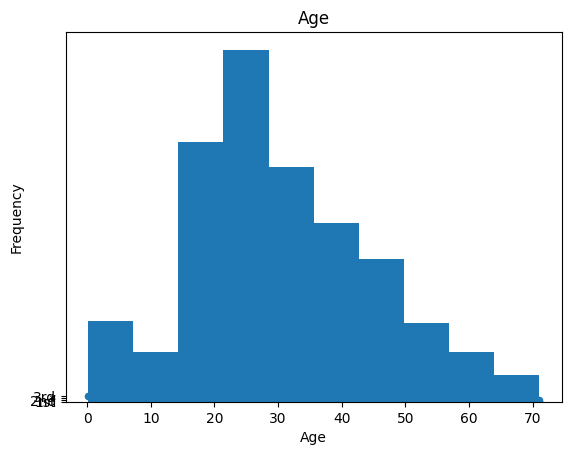

In [46]:
import matplotlib.pyplot as plt

df = pd.read_csv("_data/titanic.csv")

df.plot(kind='scatter', x='Age', y='PClass')
df['Age'].plot(kind='hist', title='Age')
